In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# DATA CLEANING AND PREPARATION

#### CUSTOMERS DATA CLEANING

In [ ]:
customer_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_customers.csv")
customer_df["registration_date"] = pd.to_datetime(customer_df["registration_date"])
customer_df.dropna(inplace=True)
customer_df["phone"] = customer_df["phone"].astype(str).str.strip()
customer_df["email"] = customer_df["email"].str.strip()
customer_df["area"] = customer_df["area"].str.strip()

In [ ]:
customer_df.head()

In [ ]:
customer_df.info()

#### ORDERS DATA CLEANING

In [ ]:
orders_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_orders.csv")
orders_df["order_date"] = pd.to_datetime(orders_df["order_date"])
orders_df["promised_delivery_time"] = pd.to_datetime(orders_df["promised_delivery_time"])
orders_df["actual_delivery_time"] = pd.to_datetime(orders_df["actual_delivery_time"])
orders_df.dropna(inplace=True)
orders_df = orders_df[orders_df["order_total"] > 0]

In [ ]:
orders_df.head()

In [ ]:
orders_df.info()

#### DELIVARY PERFORMANCE CLEANING

In [ ]:
delivery_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_delivery_performance.csv")
delivery_df["promised_time"] = pd.to_datetime(delivery_df["promised_time"])
delivery_df["actual_time"] = pd.to_datetime(delivery_df["actual_time"])
delivery_df["delivery_time_minutes"] = (delivery_df["actual_time"] - delivery_df["promised_time"]).dt.total_seconds() / 60
delivery_df.fillna("Unknown", inplace=True) 
delivery_df = delivery_df[delivery_df["distance_km"] >= 0]

In [ ]:
delivery_df.head()

In [ ]:
delivery_df.info()

#### PRODUCT DATA CLEANING

In [ ]:
products_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_products.csv")
products_df.dropna(inplace=True)
products_df = products_df[products_df["price"] >= 0]

In [ ]:
products_df.head()

In [ ]:
products_df.info()

#### MARKETING CAMPAIGN DATA CLEANING

In [ ]:
marketing_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_marketing_performance.csv")
marketing_df["date"] = pd.to_datetime(marketing_df["date"], format="%d-%m-%Y")
# marketing_df["date"] = pd.to_datetime(marketing_df["date"])
marketing_df.dropna(inplace=True) 
marketing_df = marketing_df[marketing_df["roas"] > 0]

In [ ]:
marketing_df.head()


In [ ]:
marketing_df.info()

#### INVENTORY DATA CLEANING

In [ ]:
inventory_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_inventory.csv")
inventory_df.dropna(inplace=True)  
inventory_df = inventory_df[inventory_df["stock_received"] >= 0] 

In [ ]:
inventory_df.head()

In [ ]:
inventory_df.info()

#### CUSTOMER FEEDBACK DATA CLEANING

In [ ]:
feedback_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_customer_feedback.csv")
feedback_df["feedback_date"] = pd.to_datetime(feedback_df["feedback_date"])
feedback_df.dropna(inplace=True)

In [ ]:
feedback_df.head()

In [ ]:
feedback_df.info()

#### ORDER ITEMS DATA CLEANING

In [ ]:
order_items_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_order_items.csv")
order_items_df.dropna(inplace=True)
order_items_df = order_items_df[order_items_df["quantity"] > 0]

In [ ]:
order_items_df.head()

In [ ]:
order_items_df.info()

#### NEW INVENTORY DATA CLEANING

In [ ]:
inventory_new_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_inventoryNew.csv")
inventory_new_df.dropna(inplace=True)
inventory_new_df = inventory_new_df[inventory_new_df["stock_received"] >= 0]

In [ ]:
inventory_new_df.head()

In [ ]:
inventory_new_df.info()

#### CATEGORY ICONS DATA CLEANING

In [ ]:
category_icons_df = pd.read_excel(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\Category_Icons.xlsx")
category_icons_df.dropna(inplace=True)
category_icons_df["category"] = category_icons_df["category"].str.strip()

In [ ]:
category_icons_df.head()

In [ ]:
category_icons_df.info()

#### RATING ICONS DATA CLEANING

In [ ]:
rating_icons_df = pd.read_excel(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\Rating_Icon.xlsx")
rating_icons_df.dropna(inplace=True)

In [ ]:
rating_icons_df.head(10)

In [ ]:
rating_icons_df.info()

In [ ]:
sns.set_style("whitegrid")

# VIZUALIZATION

#### 1. Customer Registration Distribution

In [ ]:
plt.figure(figsize=(5,5))
customer_df["registration_date"].dt.year.value_counts().sort_index().plot(kind="bar", color="yellow")
plt.title("Customer Registration Distribution")
plt.xlabel("Year")
plt.ylabel("Customer Count ")
plt.show()

#### 2. Daily Orders Trend

In [ ]:
plt.figure(figsize=(30,10))
orders_df.groupby(orders_df["order_date"].dt.date).size().plot(kind="line", marker="o", color="green")
plt.title("Daily Orders Trend")
plt.xlabel("Date ")
plt.ylabel("Order Count ")
plt.show()

#### 3. Orders by Hour

In [ ]:
plt.figure(figsize=(12,6))
orders_df["hour"] = pd.to_datetime(orders_df["order_date"]).dt.hour
sns.countplot(x=orders_df["hour"], color="yellow")
plt.title("Orders by Hour")
plt.xlabel("Hour")
plt.ylabel("Order Count")
plt.show()

#### 4. Orders by Area

In [ ]:
plt.figure(figsize=(12,6))
customer_orders = orders_df.merge(customer_df, on="customer_id", how="left")
customer_orders["area"].value_counts().nlargest(10).plot(kind="bar", color="green")
plt.title("Orders by Area ")
plt.xlabel("Area ")
plt.ylabel("Order Count ")
plt.show()

#### 5. Customer Segmentation

In [ ]:
plt.figure(figsize=(12,6))
customer_df["customer_segment"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["green", "red", "blue", "yellow"], startangle=90)
plt.title("Customer Segmentation")
plt.ylabel("")
plt.show()

#### 6. Sales by Product Category

In [ ]:
plt.figure(figsize=(12,6))
product_sales = order_items_df.merge(products_df, on="product_id", how="left")
product_sales["category"].value_counts().nlargest(10).plot(kind="bar", color="yellow")
plt.title("Sales by Product Category ")
plt.xlabel("Category ")
plt.ylabel("Sales Count ")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(delivery_df["distance_km"], bins=30, kde=True, color="green")
plt.title("Delivery Distance Distribution ")
plt.xlabel("Distance (km) ")
plt.ylabel("Order Count ")
plt.show()

#### 8.Orders by Day of Week

In [ ]:
plt.figure(figsize=(12,6))
orders_df["day_of_week"] = pd.to_datetime(orders_df["order_date"]).dt.day_name()
sns.countplot(x=orders_df["day_of_week"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color="yellow")
plt.title("Orders by Day of Week ")
plt.xlabel("Day ")
plt.ylabel("Order Count ")
plt.show()

#### 9.Orders by Season

In [ ]:
plt.figure(figsize=(12,6))
orders_df["season"] = orders_df["order_date"].dt.month % 12 // 4
sns.countplot(x=orders_df["season"], color="green")
plt.title("Orders by Season ")
plt.xlabel("Season (1: Summer, 2: Rain, 3: Winter)")
plt.ylabel("Order Count ")
plt.show()

#### 10.Stock Damage Rate Analysis

In [ ]:
plt.figure(figsize=(10,5))
inventory_df["damage_rate"] = inventory_df["damaged_stock"] / inventory_df["stock_received"] * 100
sns.histplot(inventory_df["damage_rate"], bins=30, kde=True, color="green")
plt.title("Damaged Stock Percentage")
plt.xlabel("Damage Rate (%)")
plt.ylabel("Product Count")
plt.show()

#### 11.Distribution

In [147]:
Label_Encoder = LabelEncoder() 
Ordinal_Encoder = OrdinalEncoder()
# Classifying Nominal and Ordinal Columns

Nominal_Columns =['customer_name','email','address','area','customer_segment']
Ordinal_Columns =['registration_date']

# Encoding Data
print(" \n NOW DATA WILL BE ENCODED \n")
for col in Nominal_Columns:
    customer_df[col] =Label_Encoder.fit_transform(customer_df[col])
    print(f"ENCODED >>> {col}")

for col in Ordinal_Columns:
    customer_df[col]= Ordinal_Encoder.fit_transform(customer_df[[col]])
    print(f"ENCODED >>> {col}")

 
 NOW DATA WILL BE ENCODED 

ENCODED >>> customer_name
ENCODED >>> email
ENCODED >>> address
ENCODED >>> area
ENCODED >>> customer_segment
ENCODED >>> registration_date


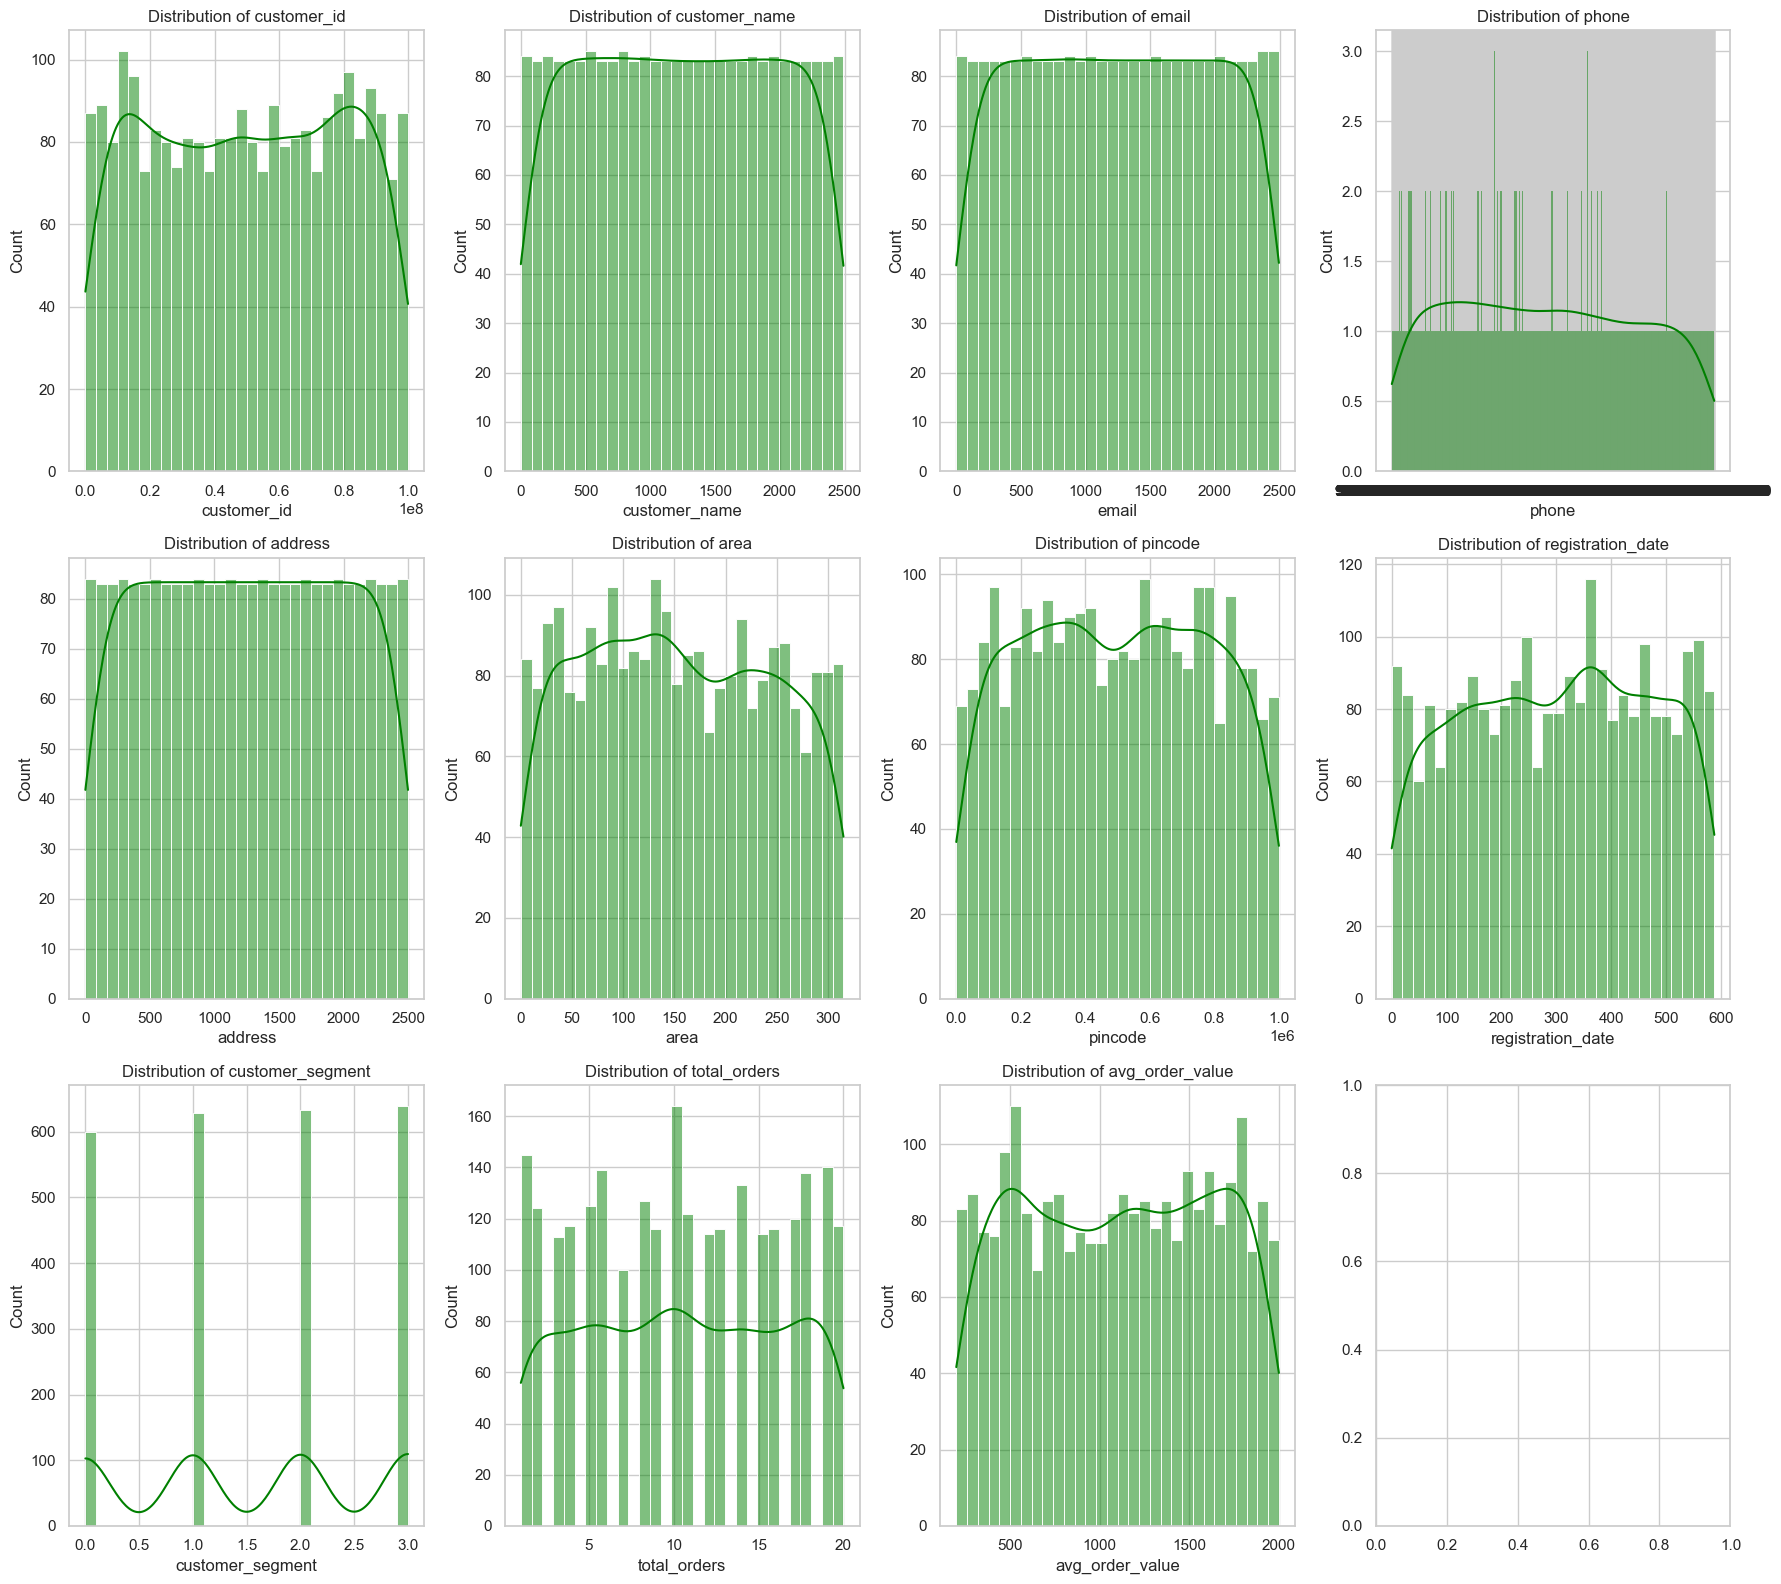

In [149]:
fig, axes = plt.subplots(3, 4, figsize=(18, 16))
features = [
    'customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'
]
for i, feature in enumerate(features):
    row, col = divmod(i, 4)
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col], color = 'Green')
    axes[row, col].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

#### 12.Correlation Heatmap

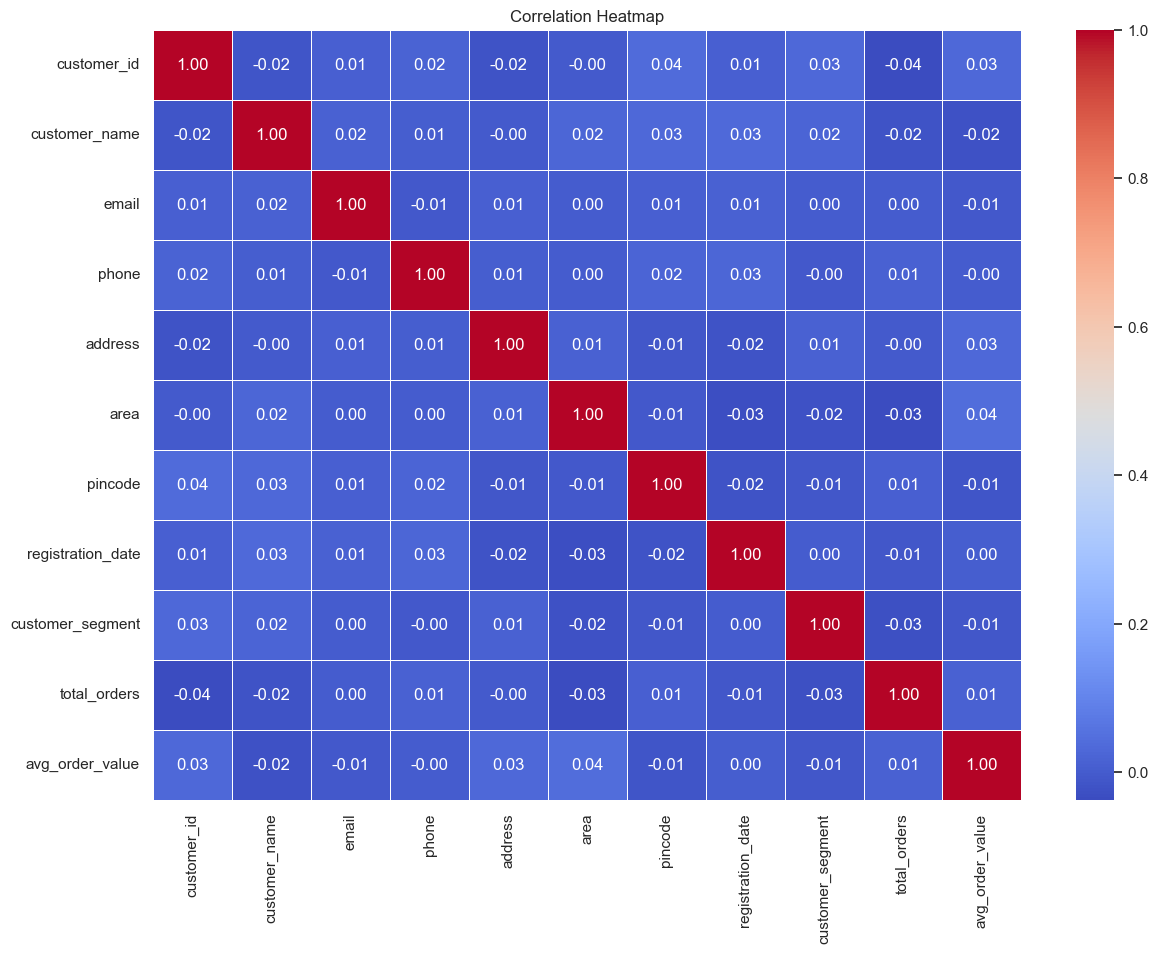

In [156]:
plt.figure(figsize=(14, 10))
corr_matrix = customer_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()